<a href="https://colab.research.google.com/github/muhammad-naeem-tahir/Assignments/blob/main/PIAIC129482_Final_Muhammad_Naeem_Tahir_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [5]:
!gdown --id 1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj

Downloading...
From: https://drive.google.com/uc?id=1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj
To: /content/archive.zip
472MB [00:02, 197MB/s]


In [6]:
from zipfile import ZipFile
file_name = '/content/archive.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop

In [8]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [9]:
data_path='/content/flowers/flowers'

In [10]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

In [36]:
datagen.flow_from_directory(data_path)

Found 4323 images belonging to 5 classes.


In [37]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.4) # set validation split

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(180, 180),
    batch_size=32,
    color_mode='rgb',
    shuffle=True,
    class_mode='sparse',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(180, 180),
    batch_size=32,
    color_mode='rgb',
    shuffle=True,
    class_mode='sparse',
    subset='validation') # set as validation data


Found 2597 images belonging to 5 classes.
Found 1726 images belonging to 5 classes.


In [54]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 256x256 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.3),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [55]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [56]:
histor=model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples //32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    epochs = 20)

Epoch 1/20
81/81 [==============================] - 37s 450ms/step - loss: 1.6230 - accuracy: 0.2376 - val_loss: 1.2695 - val_accuracy: 0.4163
Epoch 2/20
81/81 [==============================] - 36s 441ms/step - loss: 1.2707 - accuracy: 0.4258 - val_loss: 1.1546 - val_accuracy: 0.5142
Epoch 3/20
81/81 [==============================] - 35s 440ms/step - loss: 1.1416 - accuracy: 0.5219 - val_loss: 1.1206 - val_accuracy: 0.5212
Epoch 4/20
81/81 [==============================] - 36s 440ms/step - loss: 1.0002 - accuracy: 0.6046 - val_loss: 0.9973 - val_accuracy: 0.5943
Epoch 5/20
81/81 [==============================] - 36s 443ms/step - loss: 0.9378 - accuracy: 0.6269 - val_loss: 0.9483 - val_accuracy: 0.6333
Epoch 6/20
81/81 [==============================] - 35s 438ms/step - loss: 0.8650 - accuracy: 0.6777 - val_loss: 0.9639 - val_accuracy: 0.6285
Epoch 7/20
81/81 [==============================] - 35s 440ms/step - loss: 0.8218 - accuracy: 0.6935 - val_loss: 0.8555 - val_accuracy: 0.6592

In [57]:
model.save('content\\flowers\\my_model1.h5')

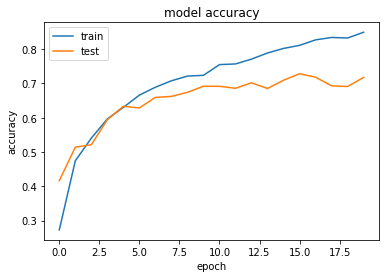

In [58]:
import matplotlib.pyplot as plt

plt.plot(histor.history['accuracy'])
plt.plot(histor.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

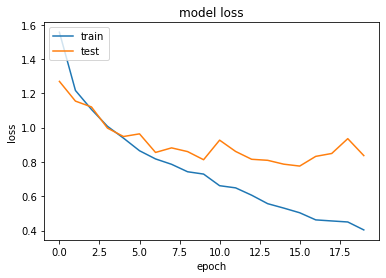

In [59]:
plt.plot(histor.history['loss'])
plt.plot(histor.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
model.evaluate(validation_generator,verbose=0) #'sgd' instead of rmsprop 

[0.8291542530059814, 0.7178447246551514]

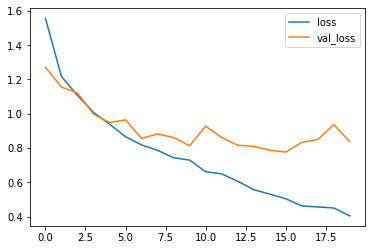

In [61]:
losses=pd.DataFrame(histor.history)
losses[['loss','val_loss']].plot()

In [62]:
y_pred1 = model.predict(validation_generator)

In [63]:
predictions=np.argmax(model.predict(validation_generator), axis=1)

In [65]:
predictions

array([1, 3, 2, ..., 2, 1, 3])